In [1]:
# Import modules
import pandas as pd # read data and manipulate data
import numpy as np # data manipulation
import matplotlib.pyplot as plt # for plotting data
import matplotlib.colors as colors
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # support vector machine classifier
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to plot confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data

%matplotlib inline

# Import Data

In [2]:
df = pd.read_excel('default of credit card clients.xls', header = 1)

# we can use the url to read dataset directly from UCI ML database also
#df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls', header=1)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
with open('attribute_info_txt', 'r') as f:
    for line in f:
        print(line)

Attribute Information:



This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = p

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
# changing the name of 'default payment next month' column to 'DEFAULT'
df.rename({'default payment next month': 'DEFAULT'}, axis = 'columns', inplace = True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# dropping id column
df.drop(['ID'], axis='columns', inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Handling Missing Data : Indentifying Missing Data

In [8]:
# checking dtypes of each column
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [9]:
df['SEX'].unique()

array([2, 1])

In [10]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [11]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

# Dealing With Missing Data

In [12]:
# Rows that have 0 in 'EDUCATION' of 0 in 'MARRIAGE' column
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

In [13]:
# total rows in a dataset
len(df)

30000

##### So 68 out of 30,000 rows, or less than 1%, contain missing values. So we will remove thos columns since we will have enough data for our classifier

In [14]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

In [15]:
len(df_no_missing)

29932

#### Since df_no_missing has 68 fewer rows than the original data, it should have 29,932 rows.

In [16]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6])

In [17]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3])

# Downsample the data

In [18]:
# dataset that contains 'DEFAULT' value 0, i.e person who didnot default
df_no_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
# dataset that containd 'DEFAULT' value 1, i.e person who defaulted
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1]

#### Now downsample the dataset that did not defaulted....

In [19]:
df_no_default_downsampled = resample(df_no_default,
                                replace=False,
                                n_samples=1000,
                                random_state=42)
len(df_no_default_downsampled)

1000

#### Now downsample the dataset that defaulted

In [20]:
df_default_downsampled = resample(df_default, 
                                 replace=False,
                                 n_samples=1000,
                                 random_state=42)
len(df_default_downsampled)

1000

In [21]:
# Merging the two downsampled datasets into a single dataframe using 'pd.concat()' method and 
# print out the total no of samples to make sure everything is hunky dory.
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample)

2000

# Format Data Part 1: Split the data into dependent and independent variables

In [22]:
# features
X = df_downsample.drop(['DEFAULT'], axis=1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [23]:
# label
y = df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

In [26]:
pd.get_dummies(data = X, columns=['MARRIAGE']).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,...,0,2500,1000,0,0,0,0,1,0,0
4678,170000,1,3,29,0,0,0,0,0,0,...,33862,7200,7500,1200,1200,1500,1300,1,0,0
16004,180000,2,2,29,0,0,0,0,0,0,...,26176,1800,1800,1500,1056,950,1000,1,0,0
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,...,0,979,412,0,0,0,0,0,1,0
17535,190000,2,3,45,0,0,0,0,0,0,...,84811,3300,3331,3359,2663,2751,3000,1,0,0


In [28]:
X_encoded = pd.get_dummies(X, columns=['SEX',
                                      'EDUCATION',
                                      'MARRIAGE',
                                      'PAY_0',
                                      'PAY_2',
                                      'PAY_3',
                                      'PAY_4',
                                      'PAY_5',
                                      'PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


# Centering and Scaling

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# Build A Preliminary Support Vector Machine

In [32]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

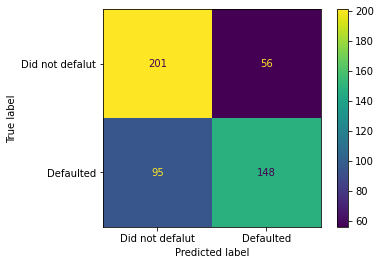

In [33]:
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test, 
                     values_format = 'd',
                     display_labels=['Did not defalut', 'Defaulted'])

# Optimize Parameters with Cross Validation and GridSearchCV()

In [48]:
param_grid = [{'C': [0.5, 1, 10, 100], # values for C must be >0
              'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf', 'linear']}]

optimal_params = GridSearchCV(SVC(),
                              param_grid,
                             cv = 5,
                             scoring='accuracy',
                             verbose=2)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.5, gamma=

# Building, Evaluating, Drawing and Interpreting the Final Support Vector Machine

In [43]:
clf_svm = SVC(random_state=42, C = 100, gamma = 0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=42)

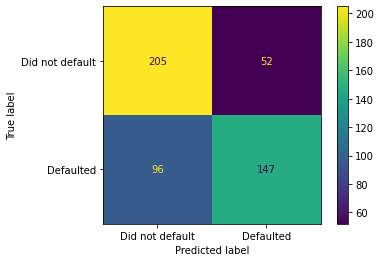

In [44]:
plot_confusion_matrix(clf_svm, 
                      X_test_scaled,
                      y_test,
                     values_format = 'd',
                      display_labels=['Did not default', 'Defaulted'])

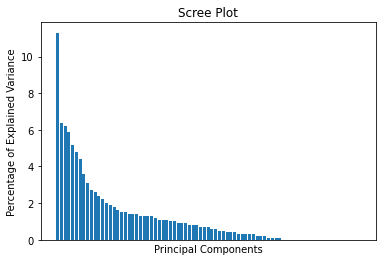

In [55]:
pca = PCA() # NOTE: By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(axis='x',
               which='both',
               bottom=False,
               top=False,
               labelbottom=False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()